In [1]:
# EDA

In [92]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [93]:
# data 
file_location = "/Users/mingchang/Downloads/"
file_name = "project_eda.csv"
my_data = pd.read_csv(file_location + file_name)

In [94]:
my_data.head()

,user_id,total_spend,country,initial_fop_set,added_fop,added_card,added_dcb,added_pp,added_sv,is_npu,pre_bw,pf_before,reach_cart,click_buy,buy_success
0,17382479401232549413,NaN,US,False,0,NaN,NaN,NaN,NaN,1,0,1,1.0,0.0,0.0
1,8857478083367093883,NaN,LB,False,0,NaN,NaN,NaN,NaN,1,0,1,1.0,0.0,0.0
2,16527362243999380659,NaN,TH,False,0,NaN,NaN,NaN,NaN,1,0,1,1.0,0.0,0.0
3,14023414775175861791,NaN,NaN,False,0,NaN,NaN,NaN,NaN,1,0,1,1.0,0.0,0.0
4,4636490359695486029,NaN,US,False,0,NaN,NaN,NaN,NaN,1,0,1,1.0,0.0,0.0


In [70]:
my_data.shape

(564647, 15)

In [73]:
# summary statistics
my_data.describe()

,total_spend,added_fop,added_card,added_dcb,added_pp,added_sv,is_npu,pre_bw,pf_before,reach_cart,click_buy,buy_success
count,88804.000000,564647.000000,169961.000000,169961.000000,169961.000000,169961.000000,564647.000000,564647.000000,564647.000000,493835.000000,493835.000000,493835.000000
mean,67.989511,0.301004,0.548573,0.479581,0.099905,0.184895,0.731891,0.621677,0.874591,0.933656,0.257752,0.211109
std,214.171619,0.458695,0.497637,0.499584,0.299875,0.388214,0.442975,1.701927,0.331183,0.248883,0.437397,0.408096
min,0.002991,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN,NaN
50%,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,1.000000,NaN,NaN,NaN
75%,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,1.000000,NaN,NaN,NaN
max,22217.620000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
# mean: center metric
def mean(x):
    return float(sum(x)) / len(x)

np.mean(my_data.total_spend)

67.98951086203343

In [50]:
# variance: how data spreads out
def stddev(x):
    m = mean(x)
    return math.pow(sum((i - m)**2 for i in X) / len(X), 0.5) # list comprehension

np.std(my_data.total_spend)

214.1704132866525

In [74]:
# quantiles
# median
# question: when to use mean, when to use median?
def median(x):
    s = sorted(x)
    n = len(x)
    lower_mid = int(math.floor((n-1)/2.))
    upper_mid = int(math.ceil((n-1)/2.))
    return (s[lower_mid], s[upper_mid])

#np.median(my_data.total_spend)
a= np.nanmedian(my_data.total_spend)
print a 
# quantile
def quantile_range(q, x):
    s = sorted(x)
    n = len(x)
    upper_d = int(math.ceil(q * (n + 1)))
    lower_d = int(math.floor(q * (n + 1)))
    # edge cases
    if upper_d == 0: upper_d = 1
    if upper_d == n+1: upper_d = n
    if lower_d == 0: lower_d = 1
    if lower_d == n+1: lower_d = n
    return (S[lower_d-1], S[upper_d-1])

#np.percentile(my_data.total_spend, [0, 25, 50, 75, 99, 100])
b = np.nanpercentile(my_data.total_spend, [0, 25, 50, 75, 99, 100])
print b

15.88
[  2.99100000e-03   4.99000000e+00   1.58800000e+01   5.49189125e+01
   7.75751500e+02   2.22176200e+04]


In [81]:
# for convinience, remove nan value
total_spend = my_data.total_spend
total_spend = total_spend.dropna()
#total_spend.fillna(0.0)
total_spend.describe()

count    88804.000000
mean        67.989511
std        214.171619
min          0.002991
25%          4.990000
50%         15.880000
75%         54.918913
max      22217.620000
Name: total_spend, dtype: float64

In [ ]:
# skewness
stats.skew(total_spend) # skewness>0 -> right skewed -> mean > median

(array([  6.,  11.,  27.,  22.,  13.,   9.,   8.,   2.,   0.,   2.]),
 array([  43.13576444,   50.43874901,   57.74173357,   65.04471814,
          72.3477027 ,   79.65068727,   86.95367184,   94.2566564 ,
         101.55964097,  108.86262553,  116.1656101 ]),
 <a list of 10 Patch objects>)

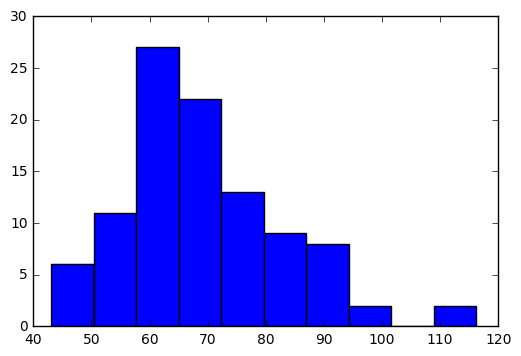

In [88]:
# CLT: our data -> normal
def get_sample(data, n):
    return np.random.choice(data, n, replace=False)

def sample_mean(x):
    return np.mean(x) / n

samples = []

N = 200
for i in range(100):
    this_sample = get_sample(total_spend, N)
    samples.append(np.mean(this_sample))

plt.hist(samples)

In [2]:
# variable transformation
# binary -> categorical
# wide <-> long

In [4]:
# missing value
# replace with some value: df.fillna()
# interpolation: df.interpolate(method='spline')

In [95]:
d1 = np.array([1,2,3,4,np.nan,6])
d2 = np.array([2,4,6,8,np.nan,12])

df = pd.DataFrame(
    {
        "d1": d1,
        "d2": d2
    },
    columns = ["d1","d2"]
)
df

,d1,d2
0,1.0,2.0
1,2.0,4.0
2,3.0,6.0
3,4.0,8.0
4,NaN,NaN
5,6.0,12.0


In [15]:
# exclude records: df.dropna(axis=0)
df.dropna(axis=0)

,d1,d2
0,1.0,2.0
1,2.0,4.0
2,3.0,6.0
3,4.0,8.0
5,6.0,12.0


In [20]:
# fill with value
df
df.fillna(5)

,d1,d2
0,1.0,2.0
1,2.0,4.0
2,3.0,6.0
3,4.0,8.0
4,5.0,5.0
5,6.0,12.0


In [96]:
# interpolation: df.interpolate(method='spline')
d3 = pd.DataFrame([1,2,3,4,np.nan,6])
d3
d3.interpolate()

,0
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0
5,6.0


In [ ]:
# our data:
# need to analzye each situation and make assumptions.
# example:
# spend: nan means there's no value in the orders table. so replace with 0 makes sense
# country: nan means country is missing. better leave it as nan

In [5]:
# outlier detection?
# depends on business use case
# show the impact of outlier on mean and standard deviation

In [ ]:
# dealing with outliers:
# better solution: winsorization
#https://en.wikipedia.org/wiki/Winsorizing

In [91]:
# own way
def winsorize_series(s):
    lower = s.quantile(0.05)
    upper = s.quantile(0.95)
    s[s < lower] = lower
    s[s > upper] = upper
    return s

my_series = pd.Series(total_spend)

result = winsorize_series(total_spend)
result.describe()

count    88804.000000
mean        49.948625
std         76.200117
min          1.027050
25%          4.990000
50%         15.880000
75%         54.918913
max        289.597193
Name: total_spend, dtype: float64

In [ ]:
# existing function in scipy
stats.mstats.winsorize()